## 9-2. Fashion MNIST 모델

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

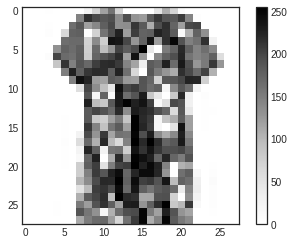

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

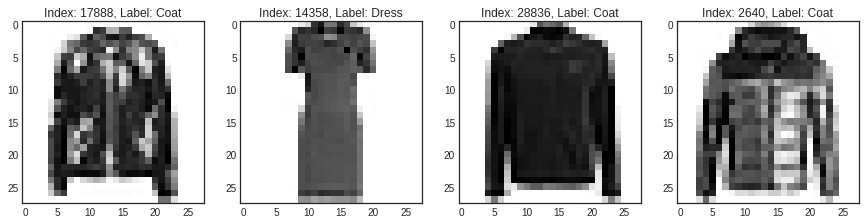

In [6]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [9]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [10]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [11]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [12]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

### 모델 구성

In [13]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/200
83/83 [==============================] - 0s 5ms/step - loss: 0.4925 - accuracy: 0.8285 - val_loss: 0.5062 - val_accuracy: 0.8255
Epoch 2/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.8293 - val_loss: 0.5055 - val_accuracy: 0.8256
Epoch 3/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.8296 - val_loss: 0.5040 - val_accuracy: 0.8259
Epoch 4/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8294 - val_loss: 0.5047 - val_accuracy: 0.8270
Epoch 5/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.8296 - val_loss: 0.5028 - val_accuracy: 0.8271
Epoch 6/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.8297 - val_loss: 0.5116 - val_accuracy: 0.8205
Epoch 7/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.8303 - val_loss: 0.5021 - val_accuracy: 0.8257
Epoch 8/200
8

Epoch 59/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.8378 - val_loss: 0.4828 - val_accuracy: 0.8332
Epoch 60/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8371 - val_loss: 0.4835 - val_accuracy: 0.8342
Epoch 61/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.8372 - val_loss: 0.4806 - val_accuracy: 0.8351
Epoch 62/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.8377 - val_loss: 0.4818 - val_accuracy: 0.8346
Epoch 63/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4655 - accuracy: 0.8377 - val_loss: 0.4822 - val_accuracy: 0.8326
Epoch 64/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.8375 - val_loss: 0.4802 - val_accuracy: 0.8345
Epoch 65/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8375 - val_loss: 0.4796 - val_accuracy: 0.8348
Epoch 

83/83 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.8424 - val_loss: 0.4671 - val_accuracy: 0.8389
Epoch 117/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4496 - accuracy: 0.8422 - val_loss: 0.4678 - val_accuracy: 0.8388
Epoch 118/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8428 - val_loss: 0.4675 - val_accuracy: 0.8409
Epoch 119/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8421 - val_loss: 0.4665 - val_accuracy: 0.8401
Epoch 120/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8424 - val_loss: 0.4656 - val_accuracy: 0.8407
Epoch 121/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.8426 - val_loss: 0.4667 - val_accuracy: 0.8388
Epoch 122/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.8429 - val_loss: 0.4649 - val_accuracy: 0.8403
Epoch 123/200

83/83 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.8461 - val_loss: 0.4563 - val_accuracy: 0.8428
Epoch 174/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4368 - accuracy: 0.8460 - val_loss: 0.4558 - val_accuracy: 0.8423
Epoch 175/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4366 - accuracy: 0.8464 - val_loss: 0.4552 - val_accuracy: 0.8448
Epoch 176/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8460 - val_loss: 0.4561 - val_accuracy: 0.8434
Epoch 177/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8461 - val_loss: 0.4591 - val_accuracy: 0.8395
Epoch 178/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4362 - accuracy: 0.8470 - val_loss: 0.4559 - val_accuracy: 0.8432
Epoch 179/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8469 - val_loss: 0.4560 - val_accuracy: 0.8429
Epoch 180/200

In [17]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

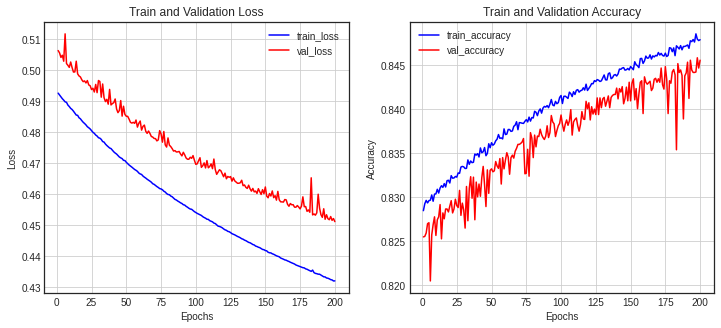

In [22]:
show_history(history)

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4713 - accuracy: 0.8324


[0.4713212847709656, 0.8324000239372253]

In [24]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

[4.0225135e-03 9.8782653e-01 6.6911679e-04 9.4681908e-04 6.4293928e-03
 1.3967618e-08 9.4877018e-05 2.0936070e-06 8.5864731e-06 4.2875268e-08]
1
Trouser


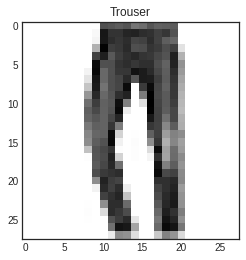

In [25]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [28]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [40]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

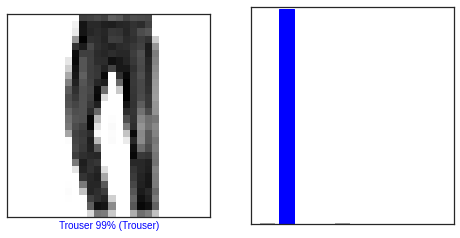

In [41]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

- epoch를 200번으로 늘렸더니 다음예에서 정답을 맞추고 있음.
- 50번 돌렸을 때는 못 맞춤.

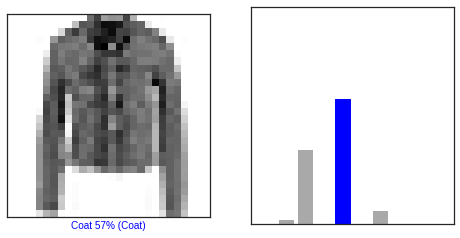

In [42]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

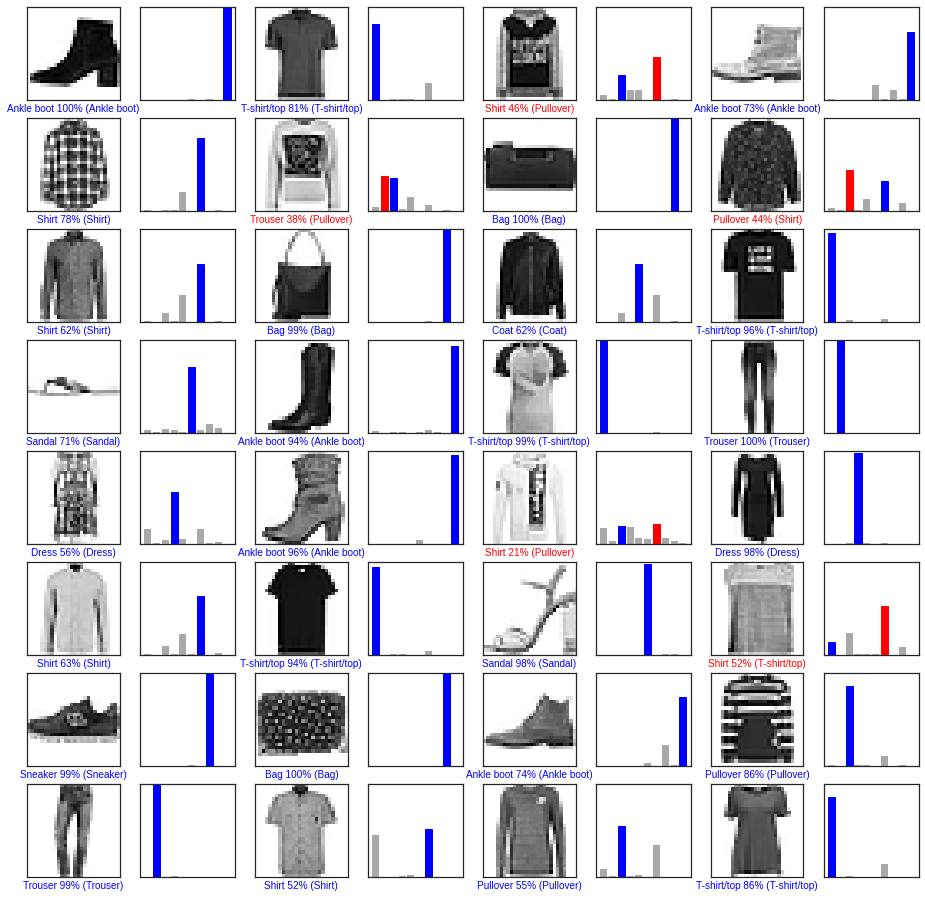

In [43]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [44]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.79      0.83      0.81      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.72      0.72      0.72      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.71      0.77      0.73      1000
      Sandal       0.92      0.90      0.91      1000
       Shirt       0.63      0.52      0.57      1000
     Sneaker       0.89      0.91      0.90      1000
         Bag       0.92      0.94      0.93      1000
  Ankle boot       0.92      0.93      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



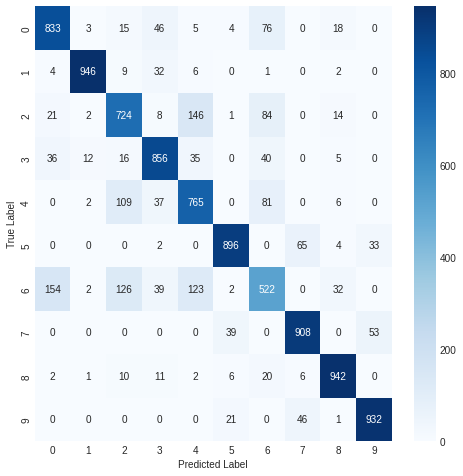

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 9-3. 모델 최적화

### Early Stopping

In [46]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4346 - accuracy: 0.8472 - val_loss: 0.4556 - val_accuracy: 0.8411
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4320 - accuracy: 0.8478 - val_loss: 0.4695 - val_accuracy: 0.8341
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4294 - accuracy: 0.8485 - val_loss: 0.4456 - val_accuracy: 0.8474
Epoch 4/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4271 - accuracy: 0.8496 - val_loss: 0.4535 - val_accuracy: 0.8390
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4242 - accuracy: 0.8505 - val_loss: 0.4443 - val_accuracy: 0.8478
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4226 - accuracy: 0.8512 - val_loss: 0.4402 - val_accuracy: 0.8494
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4202 - accuracy: 0.8512 - val_loss: 0.4417 - val_accuracy:

1313/1313 [==============================] - 3s 2ms/step - loss: 0.3594 - accuracy: 0.8725 - val_loss: 0.4092 - val_accuracy: 0.8549
Epoch 58/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3585 - accuracy: 0.8727 - val_loss: 0.3988 - val_accuracy: 0.8609
Epoch 59/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3579 - accuracy: 0.8734 - val_loss: 0.3968 - val_accuracy: 0.8619
Epoch 60/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.8735 - val_loss: 0.3958 - val_accuracy: 0.8626


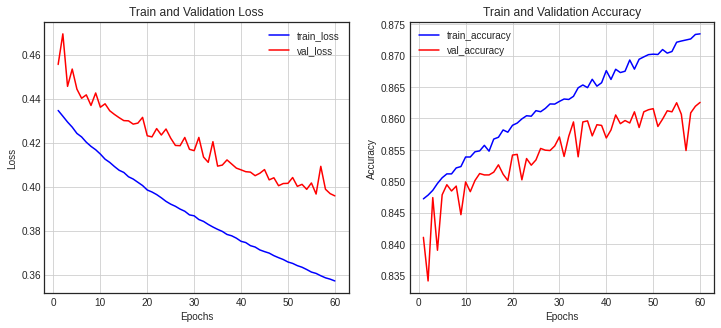

In [47]:
show_history(history)

In [48]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8501


[0.4160209000110626, 0.8500999808311462]

### 활성화함수

In [50]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [51]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7659 - accuracy: 0.7575 - val_loss: 0.5762 - val_accuracy: 0.8144
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5287 - accuracy: 0.8217 - val_loss: 0.5188 - val_accuracy: 0.8229
Epoch 3/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4799 - accuracy: 0.8362 - val_loss: 0.4895 - val_accuracy: 0.8359
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4519 - accuracy: 0.8434 - val_loss: 0.4586 - val_accuracy: 0.8423
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4321 - accuracy: 0.8491 - val_loss: 0.4447 - val_accuracy: 0.8496
Epoch 6/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4180 - accuracy: 0.8560 - val_loss: 0.4341 - val_accuracy: 0.8516
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4055 - accuracy: 0.8590 - val_loss: 0.4639 - val_accuracy:

1313/1313 [==============================] - 3s 2ms/step - loss: 0.2204 - accuracy: 0.9224 - val_loss: 0.3139 - val_accuracy: 0.8897
Epoch 58/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2181 - accuracy: 0.9234 - val_loss: 0.3166 - val_accuracy: 0.8899
Epoch 59/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2166 - accuracy: 0.9244 - val_loss: 0.3337 - val_accuracy: 0.8809
Epoch 60/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2143 - accuracy: 0.9260 - val_loss: 0.3222 - val_accuracy: 0.8889


In [52]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

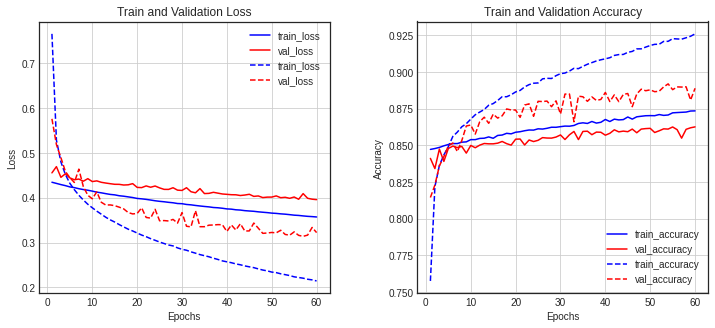

In [53]:
diff_history(history, history2)

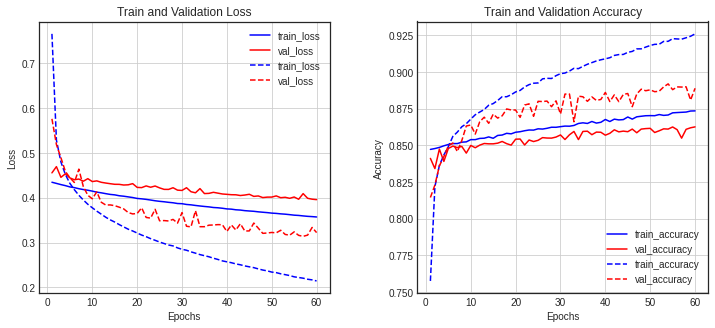

In [54]:
diff_history(history, history2)

In [55]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8760


[0.3474438488483429, 0.8759999871253967]

In [56]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 옵티마이저

In [57]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5099 - accuracy: 0.8186 - val_loss: 0.4412 - val_accuracy: 0.8432
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3730 - accuracy: 0.8648 - val_loss: 0.3710 - val_accuracy: 0.8658
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3352 - accuracy: 0.8770 - val_loss: 0.3697 - val_accuracy: 0.8652
Epoch 4/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3093 - accuracy: 0.8847 - val_loss: 0.3462 - val_accuracy: 0.8747
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2902 - accuracy: 0.8905 - val_loss: 0.3343 - val_accuracy: 0.8822
Epoch 6/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2743 - accuracy: 0.8983 - val_loss: 0.3353 - val_accuracy: 0.8838
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2610 - accuracy: 0.9020 - val_loss: 0.3554 - val_accuracy:

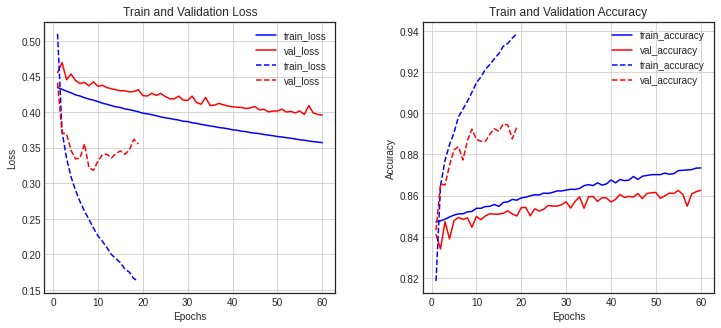

In [58]:
diff_history(history, history3)

In [59]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8824


[0.3453536033630371, 0.8823999762535095]

### 규제

In [60]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer = "l2"))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [61]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1059 - accuracy: 0.7765 - val_loss: 0.7198 - val_accuracy: 0.7969
Epoch 2/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7241 - accuracy: 0.7951 - val_loss: 0.7422 - val_accuracy: 0.7866
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6853 - accuracy: 0.8045 - val_loss: 0.6657 - val_accuracy: 0.8209
Epoch 4/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6674 - accuracy: 0.8090 - val_loss: 0.6618 - val_accuracy: 0.8157
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6429 - accuracy: 0.8161 - val_loss: 0.6031 - val_accuracy: 0.8272
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6284 - accuracy: 0.8190 - val_loss: 0.6134 - val_accuracy: 0.8194
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6069 - accuracy: 0.8241 - val_loss: 0.6588 - val_accuracy:

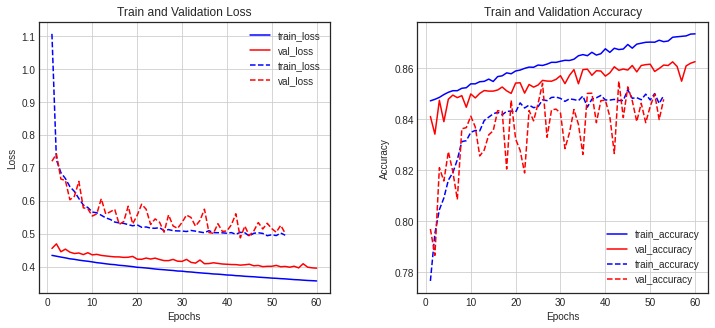

In [62]:
diff_history(history, history4)

In [63]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.8475


[0.5066505074501038, 0.8475000262260437]

### 드롭아웃

In [64]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu')) #, kernel_regularizer = "l2"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [65]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5917 - accuracy: 0.7905 - val_loss: 0.4269 - val_accuracy: 0.8495
Epoch 2/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4505 - accuracy: 0.8342 - val_loss: 0.3912 - val_accuracy: 0.8602
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4180 - accuracy: 0.8483 - val_loss: 0.3721 - val_accuracy: 0.8667
Epoch 4/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8553 - val_loss: 0.3655 - val_accuracy: 0.8638
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3807 - accuracy: 0.8586 - val_loss: 0.3863 - val_accuracy: 0.8624
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3682 - accuracy: 0.8643 - val_loss: 0.3445 - val_accuracy: 0.8780
Epoch 7/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3605 - accuracy: 0.8658 - val_loss: 0.3457 - val_accuracy:

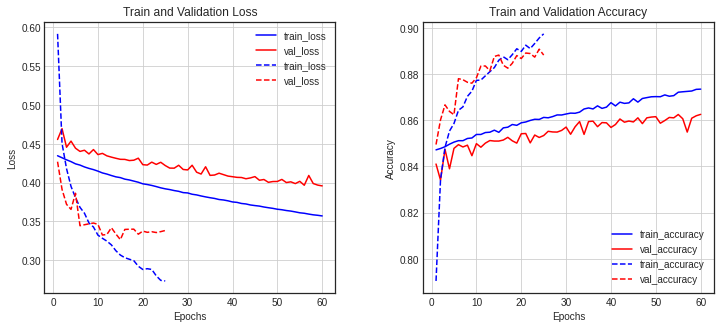

In [66]:
diff_history(history, history5)

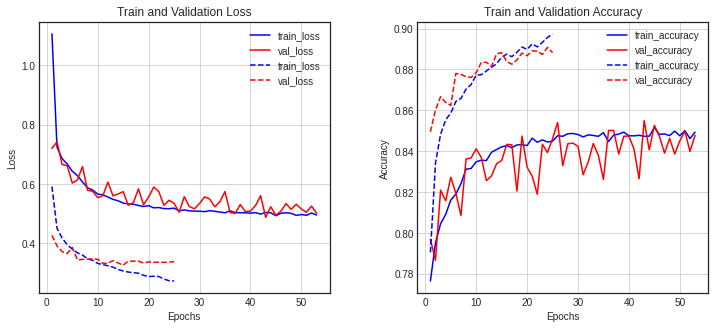

In [67]:
diff_history(history4, history5)

In [68]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8763


[0.35260528326034546, 0.8762999773025513]

### 배치 정규화

In [69]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [70]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4765 - accuracy: 0.8302 - val_loss: 0.4725 - val_accuracy: 0.8334
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3679 - accuracy: 0.8661 - val_loss: 0.4015 - val_accuracy: 0.8531
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3289 - accuracy: 0.8784 - val_loss: 0.3790 - val_accuracy: 0.8643
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3035 - accuracy: 0.8885 - val_loss: 0.3407 - val_accuracy: 0.8777
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2816 - accuracy: 0.8938 - val_loss: 0.3650 - val_accuracy: 0.8748
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2622 - accuracy: 0.9031 - val_loss: 0.3465 - val_accuracy: 0.8799
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2440 - accuracy: 0.9089 - val_loss: 0.3437 - val_accuracy:

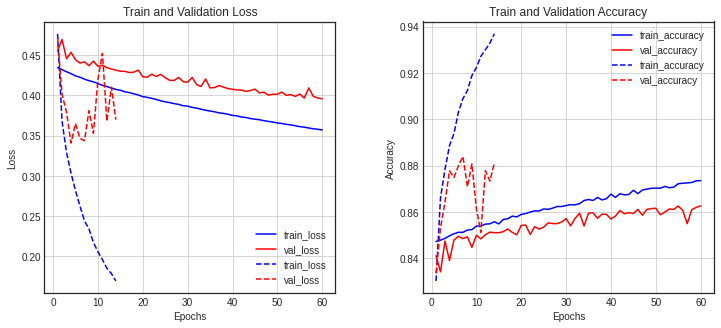

In [71]:
diff_history(history, history6)

In [73]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8702


[0.36914947628974915, 0.870199978351593]

### 배치 정규화 + 드롭아웃

In [74]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [75]:
history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5635 - accuracy: 0.7993 - val_loss: 0.4715 - val_accuracy: 0.8281
Epoch 2/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4428 - accuracy: 0.8395 - val_loss: 0.3971 - val_accuracy: 0.8566
Epoch 3/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4114 - accuracy: 0.8495 - val_loss: 0.3780 - val_accuracy: 0.8661
Epoch 4/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3888 - accuracy: 0.8594 - val_loss: 0.3746 - val_accuracy: 0.8628
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3721 - accuracy: 0.8639 - val_loss: 0.3615 - val_accuracy: 0.8694
Epoch 6/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3512 - accuracy: 0.8707 - val_loss: 0.3408 - val_accuracy: 0.8774
Epoch 7/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3392 - accuracy: 0.8745 - val_loss: 0.3386 - val_accuracy:

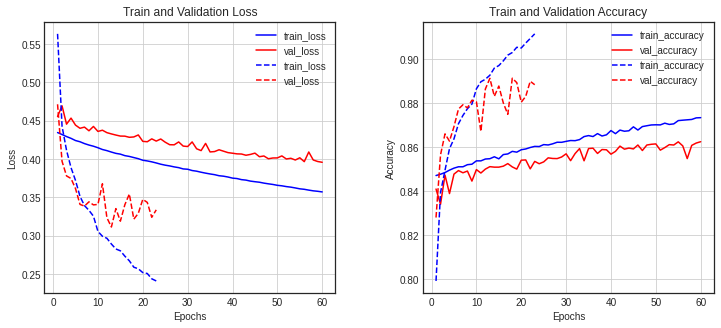

In [76]:
diff_history(history, history7)

In [77]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8826


[0.33401718735694885, 0.8826000094413757]

In [78]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 모델 결과 분석

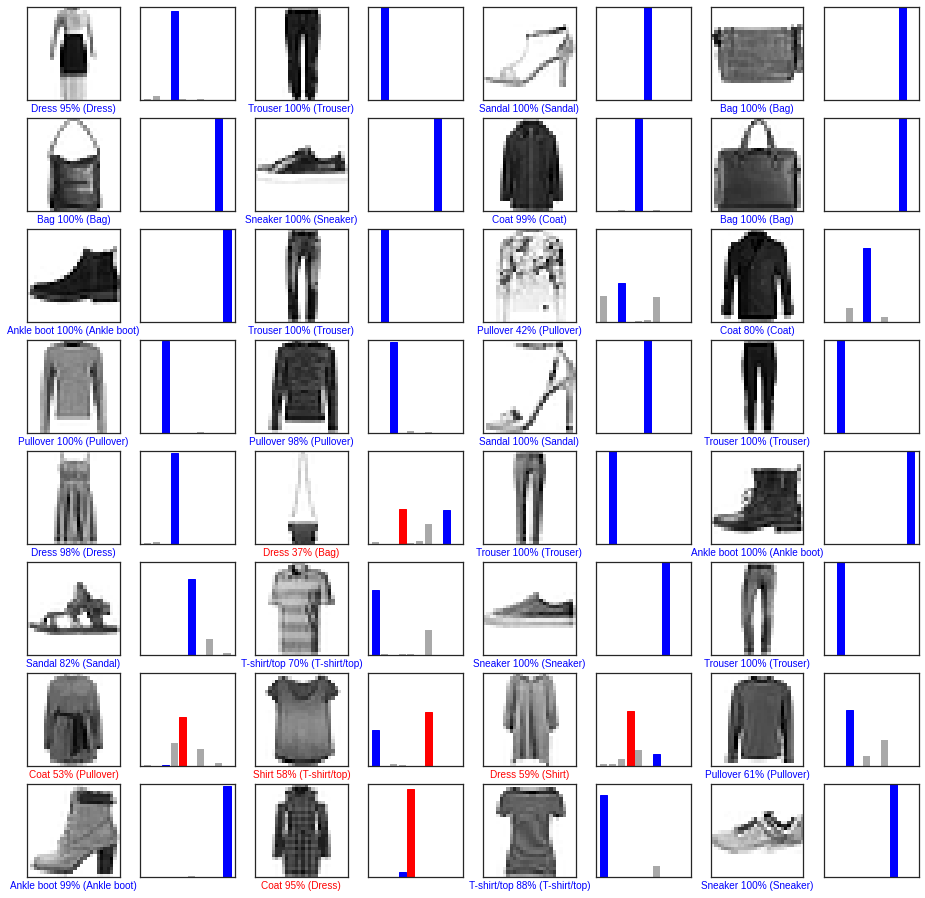

In [79]:
pred_ys = model.predict(x_test)

num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [80]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.86      0.91      0.89      1000
        Coat       0.76      0.84      0.80      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.74      0.62      0.67      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



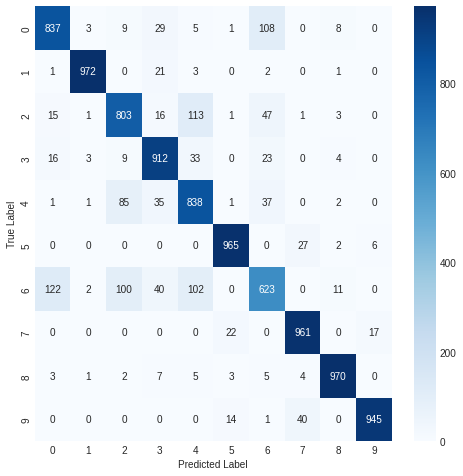

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [89]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer = 'l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [90]:
history8 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 1.1897 - accuracy: 0.7959 - val_loss: 0.8674 - val_accuracy: 0.7636
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7631 - accuracy: 0.7970 - val_loss: 0.9424 - val_accuracy: 0.7294
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7266 - accuracy: 0.8075 - val_loss: 0.8457 - val_accuracy: 0.7523
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6860 - accuracy: 0.8146 - val_loss: 0.6918 - val_accuracy: 0.8152
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6542 - accuracy: 0.8204 - val_loss: 0.6756 - val_accuracy: 0.8183
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6288 - accuracy: 0.8264 - val_loss: 0.8477 - val_accuracy: 0.7432
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6045 - accuracy: 0.8313 - val_loss: 0.8658 - val_accuracy:

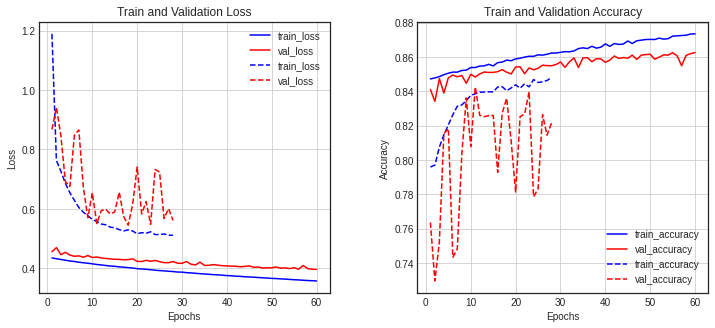

In [91]:
diff_history(history, history8)

In [92]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.8280


[0.5646904706954956, 0.828000009059906]